In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
WeblinksToLPL = "https://gol.gg/tournament/tournament-picksandbans/LPL%20Summer%202023/"
WeblinksToLCK = "https://gol.gg/tournament/tournament-picksandbans/LCK%20Summer%202023/"
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Get Bans Method Below

In [84]:
def GetAllBans(url):
    response = requests.get(url)

# Create a BeautifulSoup object by passing the response content and specifying the parser
    soup = BeautifulSoup(response.content, "html.parser")

    #print(soup)
# Find and extract specific elements from the webpage
    paragraphs = soup.find('tbody')
    test1 = paragraphs.find_all('tr')
    sections = soup.find_all('section')
# bans = paragraphs.find_all('td',text='Bans')
# print(test1[2])
    
    names = []
    wins = []
    StoreWins =[]
    StoreNames=[]
    
    for section in sections:
    # Find <img> elements with the specified class within each section
    #images = section.find_all('img', class_='champion_icon_light')
        win = section.find_all('span', attrs={"style":"text-align:center;display:inline-block"})
        name = section.find_all('img', class_='champion_icon_light')
        wins.extend(win)
        names.extend(name)
    #StoreWins.extend(''.join(wins[0].text.replace(" ", "").replace("\n", "").replace("\r", "")))
# print(wins[0].text.replace(" ", "").replace("\n", "").replace("\r", ""))
# StoreNames.extend(wins[1].text.replace(" ", "").replace("\n", "").replace("\r", ""))
#print(StoreWins)
# # Print the list of found images
    for loopwinData in wins:
        wintext=''.join(loopwinData.text.replace(" ", "").replace("\n", "").replace("\r", ""))
    # print(wintext)
        StoreWins.append(wintext)
# print(StoreWins)    
     
    for loopNameData in names:
        nametext=loopNameData['alt']
        StoreNames.append(nametext)
        my_dict = dict(zip(StoreNames, StoreWins))                
    return my_dict

 # Get Data

In [85]:
DataLPL = GetAllBans(WeblinksToLPL)
DataLCK = GetAllBans(WeblinksToLCK)

CreateGraph Method

In [134]:

def LineChart(Data,LeagueName):
    plt.plot(Data.keys(), Data.values())
    Title = 'Bans'+ LeagueName
    plt.title(Title)
    return plt
def PieChart(Data,LeagueName):
    plt.pie(Data.values(), labels=Data.keys(), autopct='%1.1f%%',radius=1800, startangle=90)
    Title = 'Bans'+' '+ LeagueName
    plt.title(str(Title))
    plt.axis('equal')
    # plt.legend(Data.values(), labels=Data.keys(), bbox_to_anchor=(-0.1, 1.),
    #        fontsize=8)
    plt.tight_layout()
    plt.show()
    return plt


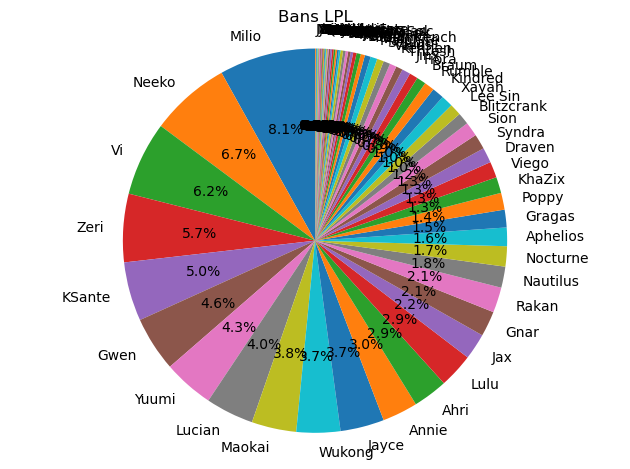

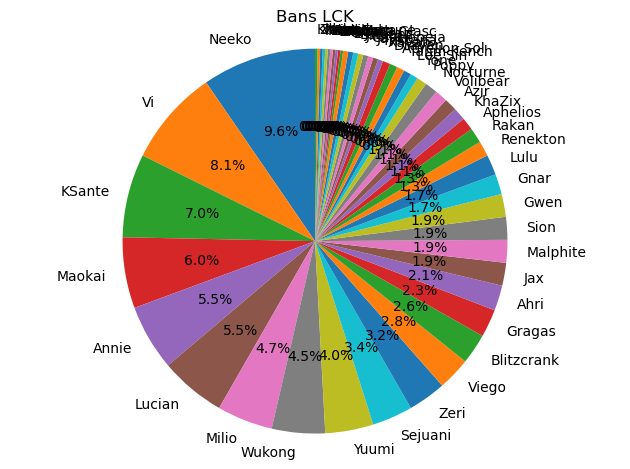

<function matplotlib.pyplot.show(close=None, block=None)>

In [135]:
#LineChart(DataLPL).show
PieChart(DataLPL ,'LPL').show
#LineChart(DataLCK).show
PieChart(DataLCK ,'LCK').show


<function matplotlib.pyplot.show(close=None, block=None)>

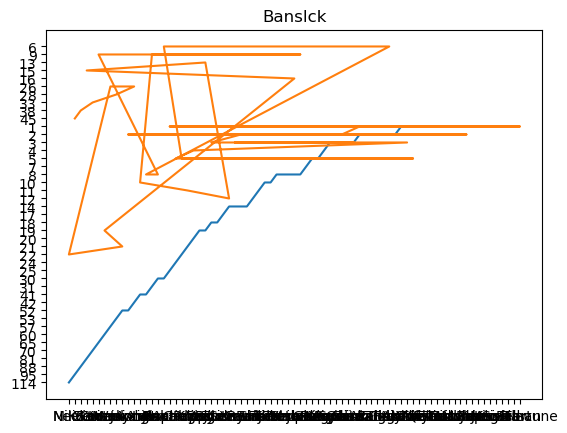

In [137]:
LineChart(DataLPL,'lpl').show
LineChart(DataLCK,'lck').show
#not valid table

### Learning Codes Below Above is Product


Turns a two list into Pairs see example when need to


# Example 1
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']

zipped = zip(list1, list2)
unzipped = zip(*zipped)

print(list(zipped))     # Output: [(1, 'a'), (2, 'b'), (3, 'c')]
print(list(unzipped))   # Output: [(1, 2, 3), ('a', 'b', 'c')]

# Example 2
list3 = [10, 20, 30]

zipped = zip(list1, list2, list3)
unzipped = zip(*zipped)

print(list(zipped))     # Output: [(1, 'a', 10), (2, 'b', 20), (3, 'c', 30)]
print(list(unzipped))   # Output: [(1, 2, 3), ('a', 'b', 'c'), (10, 20, 30)]


In [ ]:
lists = sorted(Data.items()) # sorted by key, return a list of tuples
print(lists)
print(Data)
x, y = zip(*lists) # unpack a list of pairs into two tuples

## Sample COde

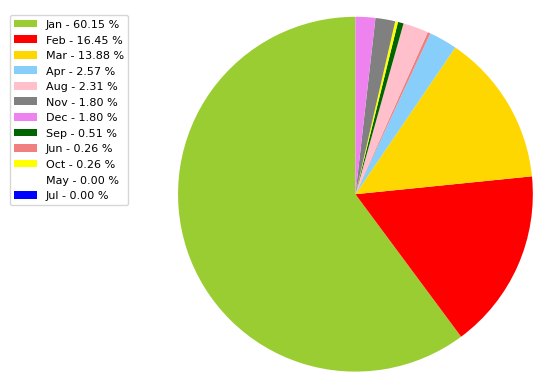

In [138]:
import matplotlib.pyplot as plt
import numpy as np

x = np.char.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov','Dec'])
y = np.array([234, 64, 54,10, 0, 1, 0, 9, 2, 1, 7, 7])
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()


# Study this link